# Finding Extreme Points
## Recap

In the last mission, we learned how to use limits to calculate the point a function approaches when the input value approaches a specific value. We applied this technique to calculate the slope of the tangent line at a specific point on our nonlinear function: $y=−(x^2)+3x−1$. If you recall from the first mission in this course, we're interested in determining the highest point on this curve.<br>

If you've ever hiked a mountain before, you'll be familiar with how the trail slopes up until you reach the peak. Once you're at the peak, however, all of the paths back down slope downwards. Understanding how the slope varies throughout a curve provides a useful lens for determining the maximum point on a curve.<br>

We'll start by building some visual intuition for how a function's slope and it's maximum point are related. In the widget below, we've generated two plots. As you vary x, the plot on the left visualizes how the tangent line for the curve changes while the plot on the right visualizes how the slope of this tangent line changes.

In [12]:
import numpy as np
import pandas as pd
import sympy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [34]:
def draw_tangent(x_value, plotting=True):
    #x = np.linspace(-20,30,100)
    #y = -1*(x**2) + x*3 - 1
    
    x,y = sympy.symbols("x y")
    y = (-x**2) + 3*x - 1
    
    y_value = (-x_value**2) + 3*x_value - 1
    
    given_limit = sympy.limit((y-y_value)/(x-x_value), x, x_value)
    y_intercept = (y_value) - given_limit * x_value
    
    
    if plotting:
        p = sympy.plotting.plot((y, (x,-5,5)),
                           (given_limit*x+y_intercept, (x, -5, 5)),
                            title="x={} tangent line\nslope={}".format(x_value, given_limit),
                            show=False
                           )
        p[0].line_color = 'blue'
        p[1].line_color = 'green'
        p.show()
    else:
        pass
    
    return given_limit
    

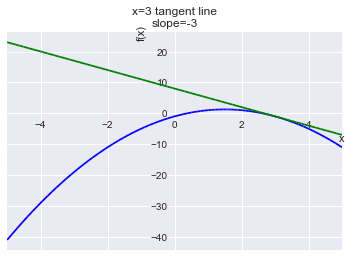

-3

In [35]:
draw_tangent(3)

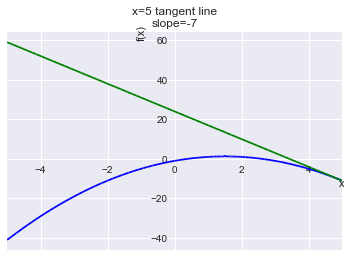

-7

In [36]:
draw_tangent(5)

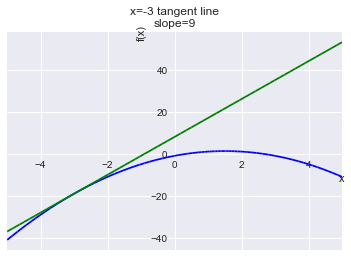

9

In [38]:
draw_tangent(-3)

In [122]:
xvals = []
slopes = []

for x in np.linspace(-10, 10, 100):
    xvals.append(x)
    slopes.append(draw_tangent(x, plotting=False))

In [123]:
slopes_by_xvals = pd.Series(slopes, index=xvals)

In [124]:
slopes_by_xvals.apply(lambda x: abs(x)).sort_values().iloc[:5]

1.515152    0.0303030303030312
1.313131     0.373737373737374
1.717172     0.434343434343432
1.111111     0.777777777777779
1.919192     0.838383838383837
dtype: object

In [125]:
draw_tangent(1.5, plotting=False)

0

* From 100 samples test:
### at $x = 1.5$, tangent line slope is minimized
### >>> at $x = 1.5$, $f(x)$ is maximized.

## Introduction To Derivatives

When $x$ is less than $1.5$, the slope is positive. As $x$ approaches $1.5$ from the left side, the slope decreases and approaches 0. At $x=1.5$, the slope of the tangent line is exactly $0v. When we increased $x$ past $1.5$ the slope of the tangent line becomes increasingly negative. The highest point on our curve acts as a kind of transition point from positive slope to negative slope. We'll discuss this in further detail later in this mission.<br>

By plotting the slopes at many different x values (the plot on the right from the last screen), we can tell that they follow a **straight line**. This line can be described as its own function, and is known as the **derivative**. A function's derivative can tell us the slope of the tangent line for any x value along the function.<br>

So far, we've been solving for the slope at specific points by plugging in the specific x value into the slope equation as expressed as a limit. To find the general function that describes the slope at any point, we need to solve the limit using the original variable instead of replacing with a specific x value.<br>

Let's first start by rewriting the slope equation to the more common form. Instead of using x1 and x2 in the slope equation, let's use x and x+h. This version of the slope equation is how most textbooks and resources refer to slope:<br>

$$\lim_{h→0}\frac{f(x+h)−f(x)}{h}$$

In this form, h represents the distance between the 2 points: x and x+h. The slope is the value the limit approaches as h approaches 0. Use the following widget to become familiar with this form of slope. In the next screen, we'll dive into finding the derivative function.

## Differentiation

The process of finding a function's derivative is known as [differentiation](https://en.wikipedia.org/wiki/Derivative#Differentiation). Instead of selecting a specific x value, we'll leave x where it is and expand the equation to solve for the derivative. Since $f(x)=−(x)^2+3x−1$, this works out to:

$$\lim_{h \to 0} \frac{(-(x + h)^2 + 3(x + h) - 1) - (-(x)^2 + 3x - 1)}{h}$$

If we continue expanding the equation to individual terms only, we get:

$$\lim_{h→0}\frac{−x^2−2xh−h^2+3x+3h−1+x2−3x+1}{h}$$

After cancelling out opposing terms, we get the following equation:

$$\lim_{h \to 0} \frac{-2xh - h^2 + 3h}{h}$$

Once we factor our the h that all of the terms in the numerator share, we get:

$$\lim_{h \to 0} \frac{h(-2x - h + 3)}{h}$$

Once we cancel the h on both the numerator and the denominator, we finally get a defined limit.

$$\lim_{h→0}−2x−h+3$$

We're going to ask you to solve the final step using direct substitution, which we discussed in the last mission. Note that the result of this limit won't be a single value, but instead a new function.


* Simplify the equation by using direct substitution to solve the limit.
* Use `numpy.linspace()` to generate `110` values from `-5` to `6` and assign to `x`.
* Transform `x` using the equation you just solved and assign to y.
Generate a line plot using `x` and `y`.

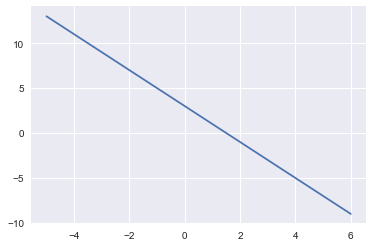

In [6]:
x = np.linspace(-5, 6, 110)
y = -2*x + 3
plt.plot(x, y); plt.show()

## Critical Points

The line plot we generated in the last step matches the one from the first step that visualizes how the slope changes for different `x` values. We use the following notation to specify that $−2x+3$ is our curve's derivative:

$$y' = -2x + 3$$

The following is an alternative form of notation, which makes it clear that the derivative of $y$ is a function of:

$$f'(x) = -2x + 3$$

The last common notation is the following, which can be read as **"the derivative with respect to $x$ is"**:

$$\frac{d}{dx}[-x^2+3x-1] = -2x + 3$$

Earlier in the mission, we discussed how the slope at $x=1.5$ was $0$ and acted as a **transition point** from positive slope to negative slope. This is formally known as a **critical point**. At a function's critical point, **the slope is either 0 or undefined**. Not all critical points act as transition points for slopes, however. The following widget visualizes the slope for y=x3 and lets you explore how the slope changes before and aftere the critical point. You'll notice how the slope remains positive before and after the critical point.

* Sympy plotting example code (basic)
```python
>>> p = Plot(visible=False)
>>> f = x**2
>>> p[1] = f
>>> p[2] = f.diff(x)
>>> p[3] = f.diff(x).diff(x)
>>> p
[1]: x**2, 'mode=cartesian'
[2]: 2*x, 'mode=cartesian'
[3]: 2, 'mode=cartesian'
>>> p.show()
>>> p.clear()
>>> p
<blank plot>
>>> p[1] =  x**2+y**2
>>> p[1].style = 'solid'
>>> p[2] = -x**2-y**2
>>> p[2].style = 'wireframe'
>>> p[1].color = z, (0.4,0.4,0.9), (0.9,0.4,0.4)
>>> p[1].style = 'both'
>>> p[2].style = 'both'
>>> p.close()
```

* Sympy plotting example code 2 (implicit)
```python
>>> from sympy import Symbol, Eq, plot_implicit
>>> x2 = Symbol('x2')
>>> plot_implicit(Eq(x2, 2.5))
```

In [79]:
def draw_tangent_derivative(x_value, plotting=True):

    x,y = sympy.symbols("x y")
    y = (-x**2) + 3*x - 1
    
    y_value = (-x_value**2) + 3*x_value - 1
    
    given_limit = sympy.limit((y-y_value)/(x-x_value), x, x_value)
    y_intercept = (y_value) - given_limit * x_value
    
    plot_range = (x, -5, 5)
    
    if plotting:
        
        p = sympy.plotting.plot((y, plot_range),
                           (given_limit*x+y_intercept, plot_range),
                            title="x={} tangent line\nslope={}".format(x_value, given_limit),
                            show=False
                           )
        p[0].line_color = 'blue'
        p[1].line_color = 'green'

        p.show()
        
        p2 = sympy.plotting.plot(
                            (y.diff(x), plot_range),
                            title="Slope at different x values",
                            show=False
        )
        p2[0].line_color = 'red'
        p2.show()
        
    else:
        pass
    
    return given_limit
    

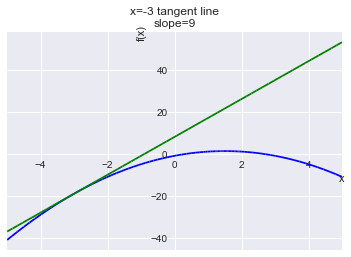

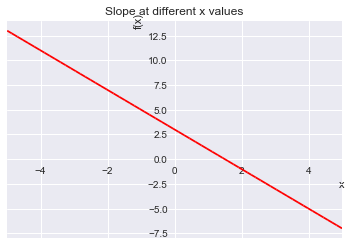

9

In [80]:
draw_tangent_derivative(-3)

### Transform `draw_tangent_derivative` function 
* from using `sympy` to using `matplotlib.pyplot`

In [148]:
def draw_tangent_derivative(x_value, plotting=True):
    
    def calc_y(x_):
        return (-x_**2) + 3*x_ - 1
    
    # use sympy lib to get limit and y_intercept
    x,y = sympy.symbols("x y")
    y = calc_y(x)
    
    y_value = (-x_value**2) + 3*x_value - 1
    given_limit = sympy.limit((y-y_value)/(x-x_value), x, x_value)    
    y_intercept = (y_value) - given_limit * x_value
    
    # re-define x,y for plot via matplotlib
    x = np.linspace(-5, 5, 100)
    y = calc_y(x)
    
    if plotting:        
        
        plt.plot(x, y, c='b')
        plt.plot(x, given_limit*x+y_intercept, c='g')
        plt.scatter(x_value, y_value, c='r', s=20)
        plt.title("x={} tangent line\nslope={}".format(x_value, given_limit))
        plt.axhline(y=y_value, color='r', linewidth=1)
        plt.axvline(x=x_value, color='r', linewidth=1)
        plt.show()
        
        
        def calc_approx_first_deriv(x_):
            h = 1e-5
            return (calc_y(x_+h)-calc_y(x_-h))/(2*h)
        
        plt.plot(x, calc_approx_first_deriv(x))
        plt.scatter(x_value, given_limit, c='r', s=20)
        plt.axhline(y=given_limit, color='r', linewidth=1)
        plt.axvline(x=x_value, color='r', linewidth=1)
        plt.title("Slope at different x values")
        plt.show()

    else:
        pass
    
    return given_limit
    

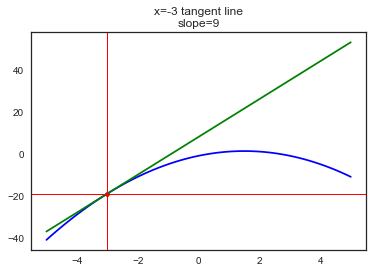

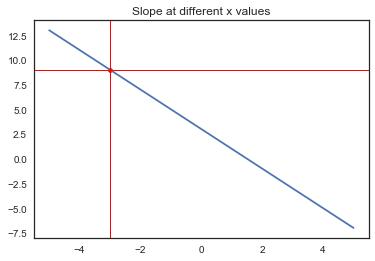

9

In [149]:
draw_tangent_derivative(-3)

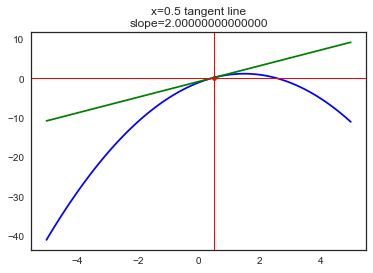

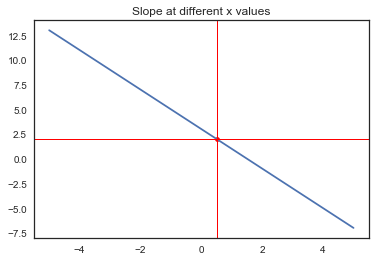

2.00000000000000

In [150]:
draw_tangent_derivative(0.5)

## Extreme Values

In the last screen, we observed how the slope didn't change from positive to negative at the critical point. Critical points are interesting to us in data science when they represent **extreme values**. Extreme values can be split into 2 categories -- minimum and maximum. As we noticed at the beginning of the mission, a critical point can be a minimum value if the slope transitions from negative to positive at that point. When the slope transitions from positive to negative at a point, it can be a maximum value. If the slope doesn't transition at a critical point, like at $x=0$ for $y=x3$ in the last screen, then it can't be a minimum or a maximum point.<br>

A curve can have multiple critical points and multiple candidates for minimum and maximum values. The following curve has 3 critical points and all 3 meet the criteria of transitioning slope from positive to negative or negative to positive. At the same time, none of the values are the highest points on the curve (while one of them seems to be the lowest).

![](https://s3.amazonaws.com/dq-content/curve_three_critical_points.png)

These values are known as local extrema, since they're the lowest or highest value in the interval surrounding each point. If a critical point is the lowest point in the interval surrounding it, it's known as a **relative minimum**. If it's the highest point in the neighborhood, it's known as a **relative maximum**.

![](https://s3.amazonaws.com/dq-content/curve_three_critical_points_relative_minmax.png)

Since we know that relative minimums and maximums can occur when the slope is $0$, we can solve for the critical points using arithmetic (instead of relying on just the graph). To calculate the critical point for our original curve, we need to set our derivative function to $0$ and solve for $x$.

$−2x+3=0$

After moving $−2x$ to the right side and dividing both sides by $−2$, we get:

$$x=1.5$$

This matches the value we observed visually in the first screen in 
this mission. Since this curve only had 1 critical point and the slope transitioned from positive to negative, we can safely say that this is a relative maximum.

## Power Rule

We calculated the derivative for our curve using a limit and working out the arithmetic. We then set the derivative function to 0 and calculated the critical points. This approach be painful to do for more complex functions like y=x5−x because we'll need to replace $x$ with $x+h$ and expand the exponent $(x+h)^5$:

$$f'(x) = \lim_{h \to 0} \frac{((x + h)^5 - (x + h)) - (x^5 - x) }{h}$$

We can instead apply derivative rules to more easily calculate the derivative function. These derivative rules have proofs that are outside the scope of this mission, but we'll link to the proof so you can build an understanding on your own.<br>

The first rule we'll introduce is the [power rule](https://en.wikipedia.org/wiki/Power_rule), which helps us take the derivative for functions with exponents.

$$f'(x) = r x^{r-1}$$

If our original function is $f(x)=x^2$, $r$ would be $2$. Its derivative would be $f′(x)=2x^2−1$ or $f′(x)=2^x$ for short. The function for our original curve is a similar value $(−x^2)$ added to $3x−1$:

$$f(x) = -(x)^2 + 3x - 1$$

When we calculate the derivative of a function, we're really computing and solving a limit. We can use the properties of limits to break down the function into 3 different derivatives. We can then apply the power rule to each component:

$$f′(x)=−2x+3$$

This matches the derivative function we computed by hand using limits. Let's practice applying the power rule to some more functions.



* Calculate the derivative of $f(x)=x^5$ using pencil and paper. Use the derivative function to look up the slope at x=2 and assign to slope_one.
* Calculate the derivative of $f(x)=x^9$ using pencil and paper. Use the derivative function to look up the slope at x=0 and assign to slope_two.

In [207]:
def calc_y(x_, coef, power):
    return coef*x_**power

def get_derivative(x_, coef, power):
    h = 1e-5
    return (calc_y(x_+h, coef, power)-calc_y(x_-h, coef, power))/(2*h)

def draw_derivative(x_, coef, power, x_value=None):
    
    xx,yy = sympy.symbols('x y')
    yy = coef*xx**power
    deriv = yy.diff(xx)
    
    h = 1e-5
    derivatives = get_derivative(x_, coef, power)
    plt.plot(x_, derivatives)
    
    if x_value != None:
        plt.title("derivative function : {}\nslope at x = {} : {}".format(deriv, x_value, get_derivative(x_value, coef, power)))
        plt.axvline(x=x_value, color='red', lw=1.0)
        plt.axhline(y=get_derivative(x_value, coef, power), color='red', lw=1.0)
        
    plt.show()

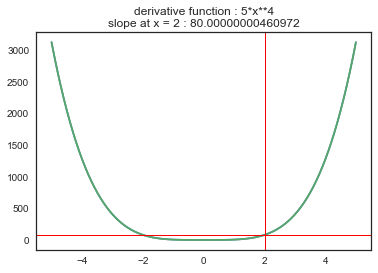

80.00000000460972

In [208]:
x = np.linspace(-5, 5, 100)
draw_derivative(x, 1, 5, 2)

slope_one = get_derivative(2, 1, 5)
slope_one

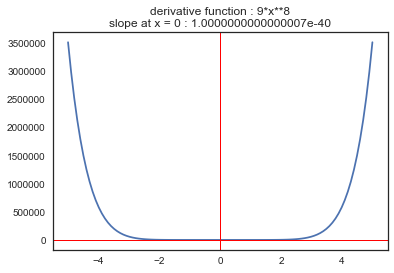

1.0000000000000007e-40

In [209]:
draw_derivative(x, 1, 9, 0)

slope_two = get_derivative(0, 1, 9)
slope_two

## Linearity Of Differentiation

Another important set of rules is [linearity of differentiation](https://en.wikipedia.org/wiki/Linearity_of_differentiation). We'll switch to using the $\frac{d}{dx}$ notation when discussing these rules. Like with limit functions, we can separate mathematical terms that are being added or subtracted and differentiate them separately.<br>

Linearity of differentiation consists of 2 rules. First is the sum rule:

$$\frac {d}{dx} [f(x) + g(x)] = \frac {d}{dx} [f(x)] + \frac {d}{dx} [g(x)]$$

Second is the constant factor rule, which lets us pull out constants from the derivative:

$$\frac {d}{dx} [cf(x)] = c\frac {d}{dx} [f(x)]$$

By combining both of these rules, we can find the derivative for a wide range of functions. For example:

$$\frac {d}{dx} [-x^3 + x^2 ] =  \frac {d}{dx} [-x^3] + \frac {d}{dx} [x^2] = -3x^2 + 2x$$


* Calculate the derivative of $f(x)=x^5−x$ using pencil and paper. Use the derivative function to look up the slope at x=1 and assign to `slope_three`.
* Calculate the derivative of $f(x)=x^3−x^2$ using pencil and paper. Use the derivative function to look up the slope at x=2 and assign to `slope_four`.

In [217]:
# update functions

def calc_y(x_, coefs, powers):
    
    res = 0
    
    for c, p in zip(coefs, powers):
        res += c*x_**p
    
    return res

def get_derivative(x_, coefs, powers):
    h = 1e-5
    return (calc_y(x_+h, coefs, powers)-calc_y(x_-h, coefs, powers))/(2*h)


def draw_derivative(x_, coefs, powers, x_value=None):
    
    xx,yy = sympy.symbols('x y')
    
    for c, p in zip(coefs, powers):
        yy += c*xx**p
    
    deriv = yy.diff(xx)
    
    h = 1e-5
    derivatives = get_derivative(x_, coefs, powers)
    plt.plot(x_, derivatives)
    
    if x_value != None:
        plt.title("derivative function : {}\nslope at x = {} : {}".format(deriv, x_value, get_derivative(x_value, coefs, powers)))
        plt.axvline(x=x_value, color='red', lw=1.0)
        plt.axhline(y=get_derivative(x_value, coefs, powers), color='red', lw=1.0)
        
    plt.show()

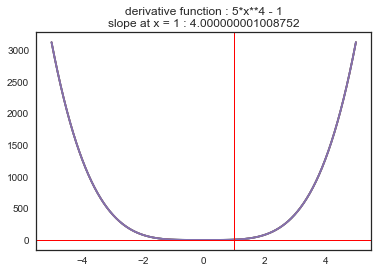

4.000000001008752

In [218]:
draw_derivative(x, [1,-1], [5,1], 1)

slope_three = get_derivative(1, [1,-1], [5,1])
slope_three

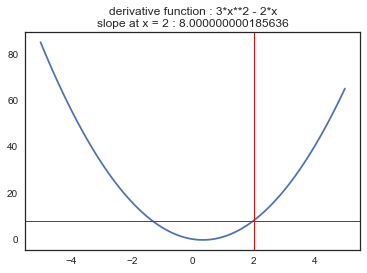

8.000000000185636

In [219]:
draw_derivative(x, [1,-1], [3,2], 2)

slope_four = get_derivative(2, [1,-1], [3,2])
slope_four

## Practicing Finding Extreme Values

In the past, we started by plotting the curve and visually observing where the critical points could be. This time around, we're not going to paint a visual picture and will instead ask you to use arithmetic to find the extreme values.<br>

You'll need to first set $3x^2−2x$ to $0$ and solve for $x$. Once you've found the critical point(s), you can analyze the slope around the point(s) to see if slope transitions from positive to negative or vice versa.

* Find the critical points for $f(x)=x^3−x^2$.
* Create 2 empty lists and assign to `rel_min` and `rel_max`.
* If a critical point is a relative minimum, add it to the list `rel_min`.
* If a critical point is a relative maximum, add it to the list `rel_max`.